<a href="https://colab.research.google.com/github/An1ndya/IIT-Kharagpur/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required modules
import numpy as np 
import heapq 
import matplotlib.pyplot as plt 
from nltk.tokenize  import RegexpTokenizer 
from keras.models  import Sequential, load_model 
from keras.layers.core import Dense, Activation 
from keras.layers import LSTM 
import pickle 
from keras.optimizers import RMSprop

# Import dataset
path = 'data.txt' 
text = open(path).read().lower() 
print('Length of the corpus is: :', len(text))

print(text[:100])

# Tokenize

tokenizer = RegexpTokenizer(r'\w+') 
words = tokenizer.tokenize(text)



Length of the corpus is: : 9030
once upon a time a wicked king from a faraway country invaded the land where a queen ruled. the inva


In [5]:
# Get unique words and index dictionary
unique_words = np.unique(words) 
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

# Create a set of next and previous words

LENGTH_WORD = 5 
next_words = [] 
prev_words = [] 
for j in range(len (words) - LENGTH_WORD) :
  prev_words.append(words [j:j + LENGTH_WORD])
  next_words.append(words[j + LENGTH_WORD]) 

print(prev_words[0]) 
print(next_words[0])

# Create X and Y to store word projections

X = np.zeros((len(prev_words), LENGTH_WORD, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words) : 
  for j, each_word in enumerate(each_words):
    X[i, j, unique_word_index[each_word]] = 1 
  Y[i, unique_word_index[next_words[i]]] = 1



['once', 'upon', 'a', 'time', 'a']
wicked


In [22]:
# Create sequential LSTM model
model = Sequential() 
model.add(LSTM(128, input_shape=(LENGTH_WORD, len(unique_words)))) 
model.add(Dense(len(unique_words))) 
model.add(Activation('softmax')) 
optimizer = RMSprop(lr=0.01) 
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


13/13 [==============================] - 2s 59ms/step - loss: 6.1780 - accuracy: 0.0354 - val_loss: 5.7100 - val_accuracy: 0.0575
Epoch 2/10
13/13 [==============================] - 0s 27ms/step - loss: 5.4542 - accuracy: 0.0707 - val_loss: 5.7532 - val_accuracy: 0.0690
Epoch 3/10
13/13 [==============================] - 0s 35ms/step - loss: 5.1817 - accuracy: 0.0933 - val_loss: 5.9355 - val_accuracy: 0.0805
Epoch 4/10
13/13 [==============================] - 1s 41ms/step - loss: 4.7127 - accuracy: 0.1195 - val_loss: 5.9352 - val_accuracy: 0.0690
Epoch 5/10
13/13 [==============================] - 1s 40ms/step - loss: 4.0692 - accuracy: 0.1738 - val_loss: 6.3874 - val_accuracy: 0.0345
Epoch 6/10
13/13 [==============================] - 0s 26ms/step - loss: 3.4262 - accuracy: 0.2433 - val_loss: 6.5186 - val_accuracy: 0.0690
Epoch 7/10
13/13 [==============================] - 0s 26ms/step - loss: 2.7650 - accuracy: 0.3518 - val_loss: 7.0299 - val_accuracy: 0.0575
Epoch 8/10
13/13 [======

In [23]:
# Save the model
model.save('next_word_model.h5') 
pickle.dump(history, open("history.p", "wb")) 
model = load_model('next_word_model.h5') 
history = pickle.load(open("history.p", "rb"))


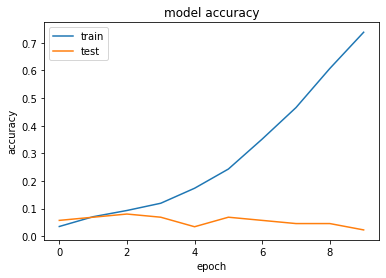

In [24]:
# Accuracy plots
plt.plot(history['accuracy']) 
plt.plot(history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')

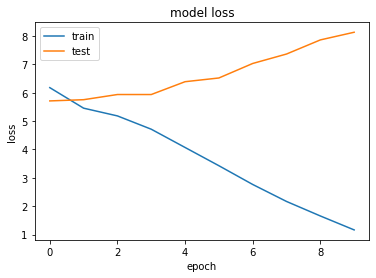

In [25]:
# Loss plots
plt.plot(history['loss']) 
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [21]:
x=2

preds = model.predict(x, verbose = 0)

IndexError: ignored